<a href="https://colab.research.google.com/github/XM2202-02/hello-github-actions/blob/main/VNese%20dishes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout


In [10]:
datagen= ImageDataGenerator(rescale=1./255)
generator = datagen.flow_from_directory(
        '/content/drive/MyDrive/VN dishes',
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical',
        color_mode='rgb',
        shuffle=True
)
test_generator = datagen.flow_from_directory(
        '/content/drive/MyDrive/VN dishes',
        target_size=(32, 32),
        batch_size=10000,
        class_mode='categorical',
        color_mode='rgb',
        shuffle=False
)
class_labels= [' Banh cuon','Banh mi','Bun bo','Chah cuon','Nem nuong']
X_batch, y_batch = next(generator)
X_test, y_test = next(test_generator)
X_batch_flattened = X_batch.reshape(X_batch.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)
print('Nhap vao:', X_batch_flattened.shape)
print('Ket qua:', y_batch.shape)

Found 25 images belonging to 5 classes.
Found 25 images belonging to 5 classes.
Nhap vao: (25, 3072)
Ket qua: (25, 5)


In [15]:
test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/VN dishes',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=10000,
    shuffle=False
)
x_train, y_train = next(generator)
x_test, y_test = next(test_generator)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Found 25 images belonging to 5 classes.
(25, 3072) (25, 5)
(25, 3072) (25, 5)


In [23]:
model= Sequential([
    Dense(256, activation='relu', input_shape=(32*32*3,)),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=200, batch_size=100,validation_data=(x_test, y_test))

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2400 - loss: 1.6841 - val_accuracy: 0.3200 - val_loss: 1.5398
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.3200 - loss: 1.5398 - val_accuracy: 0.5600 - val_loss: 1.6275
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.5600 - loss: 1.6275 - val_accuracy: 0.5600 - val_loss: 1.2037
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.5600 - loss: 1.2037 - val_accuracy: 0.6800 - val_loss: 0.9478
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.6800 - loss: 0.9478 - val_accuracy: 0.4400 - val_loss: 1.0921
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.4400 - loss: 1.0921 - val_accuracy: 0.9200 - val_loss: 0.5873
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9200 - loss: 0.5873 - val_accuracy: 0.8800 - val_loss: 0.5387
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.8800 - loss: 0.5387 - val_accuracy: 0.8400 - val_

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:%.2f'%(test_acc*100))
generator.class_indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 1.0000 - loss: 3.7174e-04
test_acc:100.00


{'Banh cuon': 0, 'Banh mi': 1, 'Bun bo': 2, 'Cha cuon': 3, 'Nem nuong': 4}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Dự đoán: Banh cuon


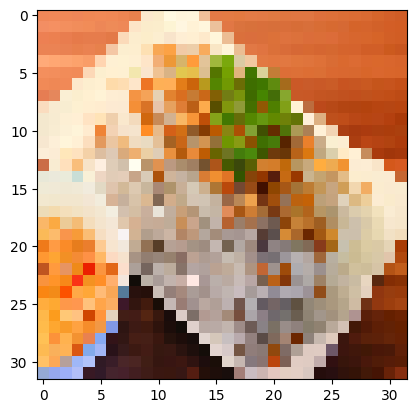

In [27]:
img=load_img('/content/drive/MyDrive/VN dishes/Banh cuon/Ảnh chụp màn hình 2025-04-13 123708.png', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,32*32*3)
img = img_to_array(img)
img_flatten = img.reshape(1, 32*32*3)
img_flatten = img_flatten.astype('float32') / 255  # normalize
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))
class_labels = list(generator.class_indices.keys())
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Dự đoán: Banh mi


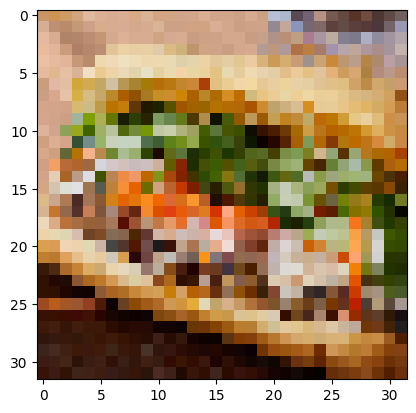

In [28]:
img=load_img('/content/drive/MyDrive/VN dishes/Banh mi/Ảnh chụp màn hình 2025-04-13 123743.png', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,32*32*3)
img = img_to_array(img)
img_flatten = img.reshape(1, 32*32*3)
img_flatten = img_flatten.astype('float32') / 255  # normalize
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))
class_labels = list(generator.class_indices.keys())
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Dự đoán: Bun bo


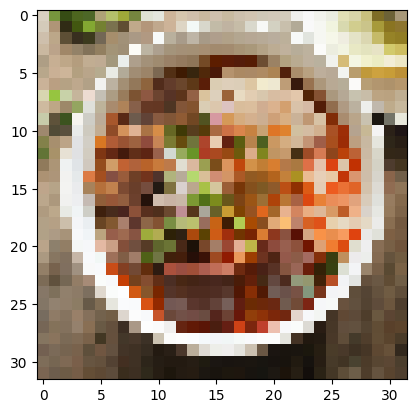

In [29]:
img=load_img('/content/drive/MyDrive/VN dishes/Bun bo/Ảnh chụp màn hình 2025-04-13 123647.png', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,32*32*3)
img = img_to_array(img)
img_flatten = img.reshape(1, 32*32*3)
img_flatten = img_flatten.astype('float32') / 255  # normalize
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))
class_labels = list(generator.class_indices.keys())
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Dự đoán: Cha cuon


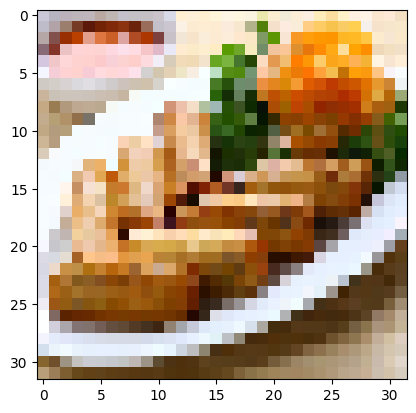

In [30]:
img=load_img('/content/drive/MyDrive/VN dishes/Cha cuon/Ảnh chụp màn hình 2025-04-13 123612.png', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,32*32*3)
img = img_to_array(img)
img_flatten = img.reshape(1, 32*32*3)
img_flatten = img_flatten.astype('float32') / 255  # normalize
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))
class_labels = list(generator.class_indices.keys())
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Dự đoán: Nem nuong


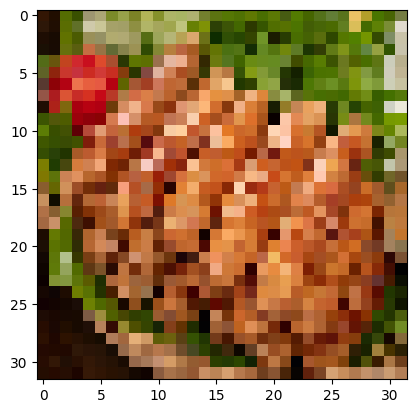

In [31]:
img=load_img('/content/drive/MyDrive/VN dishes/Nem nuong/Ảnh chụp màn hình 2025-04-13 124117.png', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,32*32*3)
img = img_to_array(img)
img_flatten = img.reshape(1, 32*32*3)
img_flatten = img_flatten.astype('float32') / 255  # normalize
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))
class_labels = list(generator.class_indices.keys())
print("Dự đoán:", class_labels[predicted_class_index])

In [32]:
model.save('trainAI.h5')